In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [660]:
Ticker = 'EURUSD=X'
start = '2023-01-01'
end = '2024-02-29'
data = yf.download(Ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [661]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,0
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,0
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,0
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,0
...,...,...,...,...,...,...
2024-02-22,1.082040,1.088625,1.080509,1.082040,1.082040,0
2024-02-23,1.082567,1.083940,1.081373,1.082567,1.082567,0
2024-02-26,1.081958,1.085906,1.081338,1.082005,1.082005,0


In [662]:
data.drop(['Volume'],
          axis=1,
          inplace=True)

In [664]:
df = pd.DataFrame(data)

In [665]:
data

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222
...,...,...,...,...,...
2024-02-22,1.082040,1.088625,1.080509,1.082040,1.082040
2024-02-23,1.082567,1.083940,1.081373,1.082567,1.082567
2024-02-26,1.081958,1.085906,1.081338,1.082005,1.082005


In [666]:
data['return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [667]:
data

,Open,High,Low,Close,Adj Close,return
Date,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,NaN
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,-0.002994
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,-0.012331
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0.005627
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,-0.007965
...,...,...,...,...,...,...
2024-02-22,1.082040,1.088625,1.080509,1.082040,1.082040,0.000671
2024-02-23,1.082567,1.083940,1.081373,1.082567,1.082567,0.000487
2024-02-26,1.081958,1.085906,1.081338,1.082005,1.082005,-0.000520


In [668]:
data.dropna()

,Open,High,Low,Close,Adj Close,return
Date,,,,,,
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,-0.002994
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,-0.012331
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0.005627
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,-0.007965
2023-01-09,1.065632,1.075951,1.065280,1.065632,1.065632,0.012664
...,...,...,...,...,...,...
2024-02-22,1.082040,1.088625,1.080509,1.082040,1.082040,0.000671
2024-02-23,1.082567,1.083940,1.081373,1.082567,1.082567,0.000487
2024-02-26,1.081958,1.085906,1.081338,1.082005,1.082005,-0.000520


# **Logistic Regression to Predict Market EURUSD **

In [669]:
lags = 3


In [670]:
cols = []
for lag in range(1, lags+ 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)


In [671]:
data.dropna(inplace=True)

In [672]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [673]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000)

In [674]:
lm.fit(data[cols], np.sign(data['return']))


LogisticRegression(C=10000000.0, max_iter=1000)

In [675]:
data['Predictions'] = lm.predict(data[cols])

In [676]:
data['Predictions'].value_counts()

 1.0    191
-1.0    108
Name: Predictions, dtype: int64

In [677]:
hits = np.sign(data['return'].iloc[lags:] *
               data['Predictions'].iloc[lags:]
               ).value_counts()

In [678]:
hits

-1.0    150
 1.0    145
 0.0      1
dtype: int64

In [679]:
accuracy_score(data['Predictions'],
               np.sign(data['return']))

0.4882943143812709

In [680]:
data['strategy'] = data['Predictions'] * data['return']

In [681]:
data

,Open,High,Low,Close,Adj Close,return,lag_1,lag_2,lag_3,Predictions,strategy
Date,,,,,,,,,,,
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,-0.007965,0.005627,-0.012331,-0.002994,1.0,-0.007965
2023-01-09,1.065632,1.075951,1.065280,1.065632,1.065632,0.012664,-0.007965,0.005627,-0.012331,-1.0,-0.012664
2023-01-10,1.073318,1.075685,1.071318,1.073318,1.073318,0.007187,0.012664,-0.007965,0.005627,1.0,0.007187
2023-01-11,1.073895,1.077470,1.072685,1.073895,1.073895,0.000537,0.007187,0.012664,-0.007965,-1.0,-0.000537
2023-01-12,1.076600,1.083835,1.073802,1.076600,1.076600,0.002516,0.000537,0.007187,0.012664,-1.0,-0.002516
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,1.082040,1.088625,1.080509,1.082040,1.082040,0.000671,0.003497,-0.000884,0.001024,1.0,0.000671
2024-02-23,1.082567,1.083940,1.081373,1.082567,1.082567,0.000487,0.000671,0.003497,-0.000884,-1.0,-0.000487
2024-02-26,1.081958,1.085906,1.081338,1.082005,1.082005,-0.000520,0.000487,0.000671,0.003497,1.0,-0.000520


In [682]:
data[['return', 'Predictions']].sum().apply(np.exp)

return         1.021484e+00
Predictions    1.112864e+36
dtype: float64

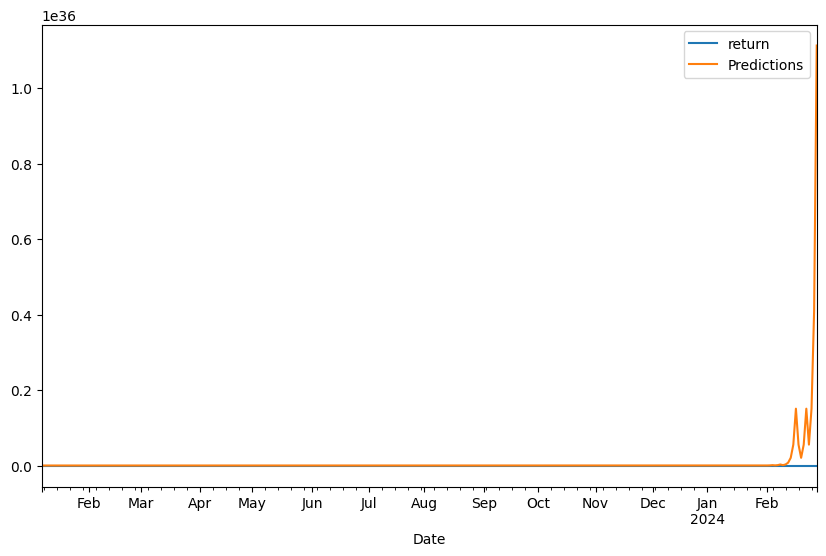

In [683]:
data[['return', 'Predictions']].cumsum().apply(np.exp).plot(figsize=(10, 6));


# **Deep Learning Networks predict Market**

In [684]:
data['return'] = np.log(data['Adj Close']/
                          data['Adj Close'].shift(1))

In [686]:
data['direction'] = np.where(data['return']> 0, 1, 0)

In [687]:
lags_ = 5

In [688]:
cols = []
for lag in range(1, lags_ + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [689]:
data.round(4).tail()

,Open,High,Low,Close,Adj Close,return,lag_1,lag_2,lag_3,Predictions,strategy,direction,lag_4,lag_5
Date,,,,,,,,,,,,,,
2024-02-22,1.0820,1.0886,1.0805,1.0820,1.0820,0.0007,0.0035,-0.0009,0.0010,1.0,0.0007,1,0.0039,0.0022
2024-02-23,1.0826,1.0839,1.0814,1.0826,1.0826,0.0005,0.0007,0.0035,-0.0009,-1.0,-0.0005,1,0.0010,0.0039
2024-02-26,1.0820,1.0859,1.0813,1.0820,1.0820,-0.0005,0.0005,0.0007,0.0035,1.0,-0.0005,0,-0.0009,0.0010
2024-02-27,1.0851,1.0866,1.0834,1.0851,1.0851,0.0028,-0.0005,0.0005,0.0007,1.0,0.0028,1,0.0035,-0.0009
2024-02-28,1.0850,1.0850,1.0801,1.0834,1.0834,-0.0015,0.0028,-0.0005,0.0005,1.0,-0.0015,0,0.0007,0.0035


In [690]:
import tensorflow as tf
from keras.models  import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import random

In [691]:
optimizer = Adam(learning_rate=0.0001)

In [692]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [693]:
set_seeds()

model = Sequential()
model.add(Dense(64, activation='relu',
        input_shape=(lags_,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [694]:
cut_off = '27-02-2024'

In [695]:
train_data = data[data.index < cut_off].copy()

<ipython-input-695-046aa937e6e7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data = data[data.index < cut_off].copy()


In [696]:
mu, std = train_data.mean(), train_data.std()

In [697]:
train_data_ = (train_data - mu) / std

In [698]:
mu, std

(Open           1.082781
 High           1.085994
 Low            1.079367
 Close          1.082782
 Adj Close      1.082782
 return        -0.000013
 lag_1          0.000019
 lag_2          0.000026
 lag_3          0.000026
 Predictions    0.278351
 strategy      -0.000016
 direction      0.501718
 lag_4          0.000038
 lag_5          0.000085
 dtype: float64,
 Open           0.015574
 High           0.015456
 Low            0.015436
 Close          0.015574
 Adj Close      0.015574
 return         0.004421
 lag_1          0.004451
 lag_2          0.004453
 lag_3          0.004453
 Predictions    0.962134
 strategy       0.004421
 direction      0.500858
 lag_4          0.004468
 lag_5          0.004529
 dtype: float64)

In [699]:
test_data = data[data.index >= cut_off].copy()

<ipython-input-699-7673570708d6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data = data[data.index >= cut_off].copy()


In [700]:
test_data_ = (test_data - mu) / std

In [701]:
test_data_

,Open,High,Low,Close,Adj Close,return,lag_1,lag_2,lag_3,Predictions,strategy,direction,lag_4,lag_5
Date,,,,,,,,,,,,,,
2024-02-27,0.148449,0.040095,0.258987,0.148421,0.148421,0.647439,-0.121004,0.103545,0.144871,0.750051,0.648076,0.994856,0.774213,-0.213938
2024-02-28,0.139379,-0.067453,0.050515,0.041228,0.041228,-0.345359,0.636033,-0.122507,0.103650,0.750051,-0.344725,-1.001717,0.141543,0.753583


In [702]:
%%time
model.fit(train_data[cols],
          train_data['direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False)

CPU times: user 3.64 s, sys: 132 ms, total: 3.77 s
Wall time: 6.05 s


In [703]:
res = pd.DataFrame(model.history.history)

In [704]:
res

,loss,accuracy,val_loss,val_accuracy
0,0.693135,0.521552,0.693087,0.559322
1,0.693058,0.538793,0.693051,0.627119
2,0.693010,0.551724,0.693038,0.593220
3,0.692981,0.521552,0.693022,0.542373
4,0.692963,0.517241,0.693008,0.542373
5,0.692948,0.530172,0.692992,0.525424
6,0.692934,0.530172,0.692987,0.525424
7,0.692920,0.534483,0.692981,0.542373
8,0.692906,0.530172,0.692977,0.525424
9,0.692894,0.534483,0.692973,0.525424


<Axes: >

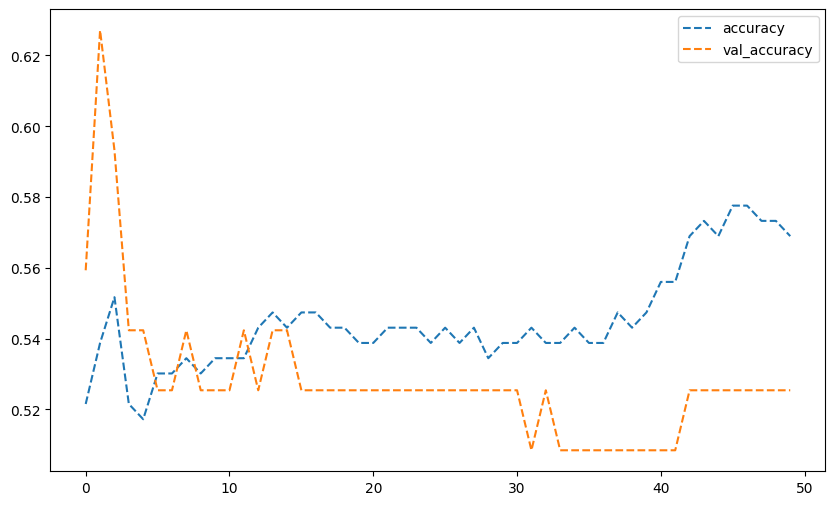

In [705]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--')

In [706]:
model.evaluate(train_data_[cols], train_data['direction'])

10/10 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5430


[0.6964215636253357, 0.5429553389549255]

In [707]:
pred = np.where(model.predict(train_data_[cols]) > 0.5, 1, 0)

10/10 [==============================] - 0s 3ms/step


In [708]:
pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [709]:
array = pred[:30].flatten()

In [710]:
array

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1])

In [711]:
train_data['prediction'] = np.where(pred > 0, 1, -1)

In [712]:
train_data['Strategy'] = (train_data['prediction'] *
                          train_data['return'])

In [714]:
train_data[['return', 'Strategy']].sum().apply(np.exp)

return      0.996300
Strategy    1.053481
dtype: float64

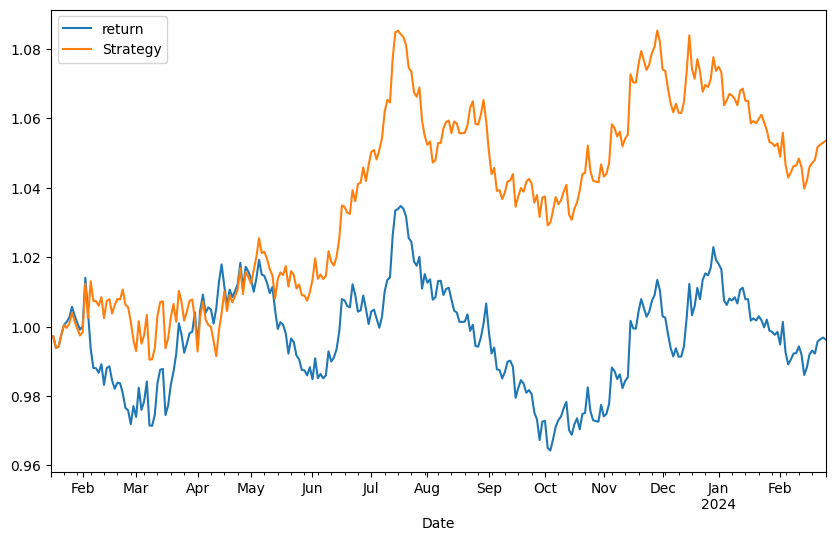

In [716]:
train_data[['return', 'Strategy']].cumsum(
             ).apply(np.exp).plot(figsize=(10, 6));


In [717]:
train_data

,Open,High,Low,Close,Adj Close,return,lag_1,lag_2,lag_3,Predictions,strategy,direction,lag_4,lag_5,prediction,Strategy
Date,,,,,,,,,,,,,,,,
2023-01-16,1.082462,1.087548,1.080264,1.082462,1.082462,-0.003285,0.008715,0.002516,0.000537,-1.0,0.003285,0,0.007187,0.012664,1,-0.003285
2023-01-17,1.083013,1.086909,1.078702,1.083013,1.083013,0.000509,-0.003285,0.008715,0.002516,-1.0,-0.000509,1,0.000537,0.007187,1,0.000509
2023-01-18,1.079331,1.088447,1.076704,1.079331,1.079331,-0.003406,0.000509,-0.003285,0.008715,1.0,-0.003406,0,0.002516,0.000537,1,-0.003406
2023-01-19,1.079785,1.083306,1.078295,1.079785,1.079785,0.000421,-0.003406,0.000509,-0.003285,1.0,0.000421,1,0.008715,0.002516,1,0.000421
2023-01-20,1.083388,1.085658,1.080462,1.083388,1.083388,0.003331,0.000421,-0.003406,0.000509,1.0,0.003331,1,-0.003285,0.008715,1,0.003331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20,1.077540,1.083858,1.076252,1.077540,1.077540,-0.000884,0.001024,0.003882,0.002166,-1.0,0.000884,0,-0.005897,-0.002405,-1,0.000884
2024-02-21,1.081315,1.082251,1.079191,1.081315,1.081315,0.003497,-0.000884,0.001024,0.003882,1.0,0.003497,1,0.002166,-0.005897,1,0.003497
2024-02-22,1.082040,1.088625,1.080509,1.082040,1.082040,0.000671,0.003497,-0.000884,0.001024,1.0,0.000671,1,0.003882,0.002166,1,0.000671


In [718]:
model.evaluate(test_data_[cols], test_data['direction'])

1/1 [==============================] - 0s 29ms/step - loss: 0.6542 - accuracy: 0.5000


[0.654212236404419, 0.5]

In [719]:
pred_ = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

1/1 [==============================] - 0s 21ms/step


In [720]:
pred_[:30].flatten()

array([1, 1])

In [722]:
test_data['prediction'] = np.where(pred_ > 0, 1, -1)

In [723]:
test_data['prediction'].value_counts()


1    2
Name: prediction, dtype: int64

In [725]:
test_data['strategy_'] = (test_data['prediction'] *
                          test_data['return'])

In [727]:
test_data[['return', 'strategy_']].sum().apply(np.exp)

return       1.001311
strategy_    1.001311
dtype: float64

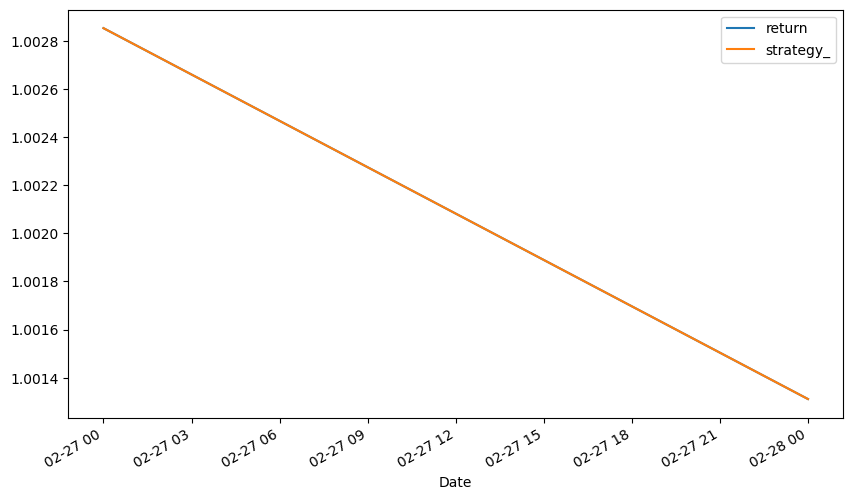

In [729]:
test_data[['return', 'strategy_']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [730]:
data['momentum'] = data['return'].rolling(5).mean().shift(1)

In [731]:
data['Vol'] = data['return'].rolling(20).std().shift(1)

In [732]:
data['distance'] = (data['Adj Close'] -
                    data['Adj Close'].rolling(50).mean()).shift(1)

In [733]:
data.dropna(inplace=True)

In [734]:
cols.extend(['momentum', 'Vol', 'distance'])

In [735]:
print(data.round(4).tail())

              Open    High     Low   Close  Adj Close  return   lag_1   lag_2  \
Date                                                                            
2024-02-22  1.0820  1.0886  1.0805  1.0820     1.0820  0.0007  0.0035 -0.0009   
2024-02-23  1.0826  1.0839  1.0814  1.0826     1.0826  0.0005  0.0007  0.0035   
2024-02-26  1.0820  1.0859  1.0813  1.0820     1.0820 -0.0005  0.0005  0.0007   
2024-02-27  1.0851  1.0866  1.0834  1.0851     1.0851  0.0028 -0.0005  0.0005   
2024-02-28  1.0850  1.0850  1.0801  1.0834     1.0834 -0.0015  0.0028 -0.0005   

             lag_3  Predictions  strategy  direction   lag_4   lag_5  \
Date                                                                   
2024-02-22  0.0010          1.0    0.0007          1  0.0039  0.0022   
2024-02-23 -0.0009         -1.0   -0.0005          1  0.0010  0.0039   
2024-02-26  0.0035          1.0   -0.0005          0 -0.0009  0.0010   
2024-02-27  0.0007          1.0    0.0028          1  0.0035 -0.0009   


In [736]:
train_data = data[data.index < cut_off].copy()

<ipython-input-736-046aa937e6e7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data = data[data.index < cut_off].copy()


In [737]:
mu, std = train_data.mean(), train_data.std()

In [738]:
train_data_ = (train_data - mu) / std

In [739]:
test_data = data[data.index >= cut_off].copy()

<ipython-input-739-7673570708d6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data = data[data.index >= cut_off].copy()


In [740]:
test_data_ = (test_data - mu) / std

In [741]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [742]:
%%time
model.fit(train_data_[cols], train_data['direction'],
          verbose=True, epochs=25)

Epoch 1/25
8/8 [==============================] - 1s 3ms/step - loss: 0.7287 - accuracy: 0.5104
Epoch 2/25
8/8 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.5145
Epoch 3/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5353
Epoch 4/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5270
Epoch 5/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5394
Epoch 6/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5394
Epoch 7/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5436
Epoch 8/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.5685
Epoch 9/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.5851
Epoch 10/25
8/8 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.5975
Epoch 11/25
8/8 [======================

In [743]:
model.evaluate(train_data_[cols], train_data['direction'])

8/8 [==============================] - 0s 4ms/step - loss: 0.6160 - accuracy: 0.6680


[0.6159904599189758, 0.6680498123168945]

In [744]:
pred = np.where(model.predict(train_data_[cols]) > 0.5, 1, 0)

8/8 [==============================] - 0s 2ms/step


In [746]:
train_data['prediction'] = np.where(pred > 0, 1, -1)

In [748]:
train_data['strategy_1'] = (train_data['prediction'] *
                            train_data['return'])

In [749]:
train_data[['return', 'strategy_1']].sum().apply(np.exp)

return        0.998615
strategy_1    1.271058
dtype: float64

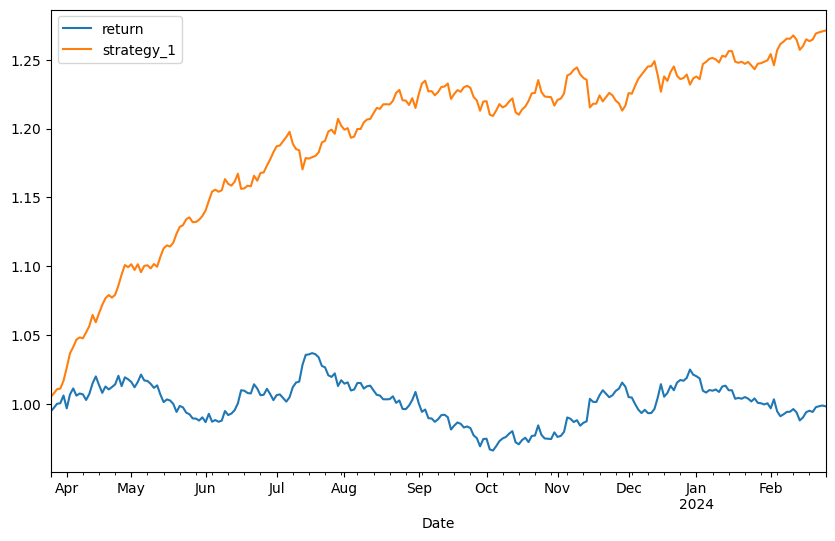

In [751]:
train_data[['return', 'strategy_1']].cumsum(
             ).apply(np.exp).plot(figsize=(10, 6));

In [752]:
model.evaluate(test_data_[cols], test_data['direction'])

1/1 [==============================] - 0s 28ms/step - loss: 0.6429 - accuracy: 0.5000


[0.6429462432861328, 0.5]

In [753]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

1/1 [==============================] - 0s 22ms/step


In [754]:
pred

array([[1],
       [1]])

In [755]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [756]:
test_data['prediction'].value_counts()

1    2
Name: prediction, dtype: int64

In [757]:
test_data['strategy_2'] = (test_data['prediction'] *
                           test_data['return'])

In [758]:
test_data[['return', 'strategy_2']].sum().apply(np.exp)

return        1.001311
strategy_2    1.001311
dtype: float64

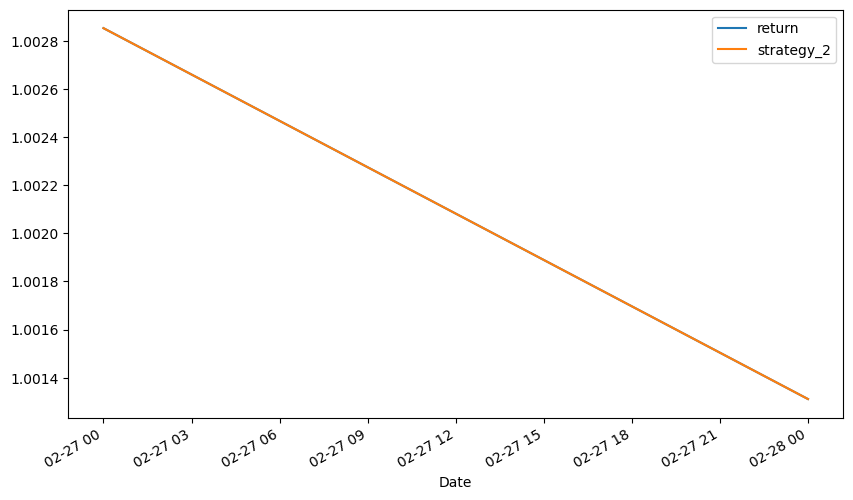

In [760]:
test_data[['return', 'strategy_2']].cumsum(
           ).apply(np.exp).plot(figsize=(10, 6));